In [1]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Sentiment_analysis_tweets/Data/tweets.csv')
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [3]:
data['tweet'][1]

'Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/'

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [5]:
data.isnull().sum()

,0
id,0
label,0
tweet,0


In [6]:
data['label'].value_counts(normalize=True)

,proportion
label,
0,0.744192
1,0.255808


<Axes: xlabel='label'>

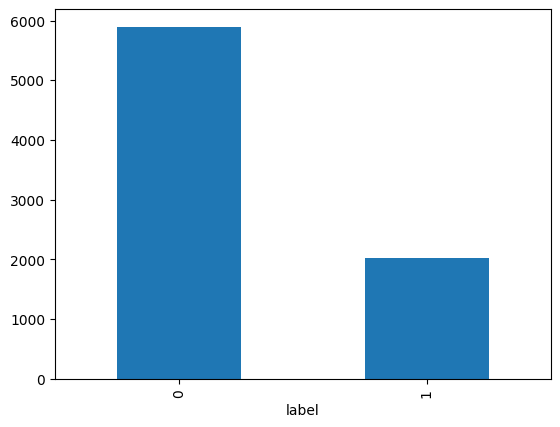

In [7]:
data['label'].value_counts().plot(kind='bar')

In [8]:
data['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [9]:
import re

In [10]:
re.sub(r"'s\b"," is", data['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

In [11]:
data['tweet'][11]

'Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade'

In [12]:
re.sub("@[A-Za-z0-9]+", "", data['tweet'][11])

'Ha! Not heavy machinery but it does what I need it to.  really dropped the ball with that design. #drinkyourhaterade'

In [13]:
data['tweet'][0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [14]:
re.sub("#", "",data['tweet'][0])

'fingerprint Pregnancy Test https://goo.gl/h1MfQV android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [15]:
re.sub(f"http\S+", "", data['tweet'][0])

'#fingerprint #Pregnancy Test  #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [16]:
data['tweet'][25]

'1.05 billion for 3 patents where there is prior art = 300 millions each = patent trolls are partying now thanks to Apple #apple'

In [17]:
re.sub(r"[^a-zA-Z]"," ",data['tweet'][0])

' fingerprint  Pregnancy Test https   goo gl h MfQV  android  apps  beautiful  cute  health  igers  iphoneonly  iphonesia  iphone'

In [18]:
import nltk
from nltk.corpus import stopwords

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
nltk_stopwords = set(stopwords.words('english'))
print(len(nltk_stopwords))

179


In [21]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'ourselves', 'became', 'bill', 'ever', 'while', 'wherein', 'fifty', 'twelve', 'also', 'inc', 'herself', 'amoungst', 'either', 'around', 'forty', 'toward', 'few', 'must', 'well', 'all', 'each', 'towards', 'con', 'give', 'down', 'thereupon', 'his', 'along', 'onto', 'noone', 'such', 'everywhere', 'your', 'fill', 'thick', 'himself', 'those', 'next', 'on', 'thereafter', 'then', 'top', 'throughout', 'who', 'hundred', 'some', 'although', 'they', 'nevertheless', 'hers', 'among', 'eg', 'my', 'thus', 'describe', 'not', 'seem', 'neither', 'nobody', 'am', 'themselves', 'thin', 'had', 'have', 'mine', 'show', 'indeed', 'something', 'so', 'a', 'already', 'much', 'which', 'mill', 'an', 'very', 'find', 'whole', 'many', 'every', 'front', 'yet', 'because', 'mostly', 'made', 'how', 'several', 'whom', 'are', 'everyone', 'ie', 'seeming', 'co', 'fifteen', 'somewhere', 'own', 'none', 'other', 'more', 'if', 'see', 'against', 'others', 'side', 'couldnt', 're', 'since', 'cannot', 'him', 'whereas', 'done', 'woul

In [22]:
print(nltk_stopwords.intersection(sklearn_stopwords))

{'ourselves', 'no', 'above', 'our', 'while', 'up', 'only', 'herself', 'as', 'now', 'these', 'yourselves', 'was', 'we', 'will', 'the', 'yours', 'should', 'few', 'all', 'where', 'each', 'down', 'and', 'his', 'such', 'your', 'being', 'that', 'out', 'himself', 'those', 'it', 'by', 'on', 'here', 'then', 'over', 'below', 'who', 'some', 'between', 'they', 'hers', 'my', 'you', 'not', 'themselves', 'am', 'have', 'had', 'so', 'their', 'a', 'off', 'which', 'an', 'very', 'through', 'this', 'both', 'is', 'because', 'to', 'whom', 'how', 'are', 'of', 'do', 'own', 'myself', 'other', 'more', 'if', 'against', 'most', 'at', 're', 'once', 'with', 'until', 'him', 'than', 'again', 'same', 'about', 'yourself', 'when', 'under', 'there', 'from', 'after', 'further', 'were', 'during', 'can', 'but', 'why', 'she', 'what', 'any', 'itself', 'be', 'ours', 'them', 'he', 'into', 'her', 'me', 'before', 'has', 'for', 'been', 'i', 'nor', 'or', 'its', 'in', 'too'}


In [23]:
common_stopwords = nltk_stopwords.union(sklearn_stopwords)

In [24]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [25]:
data['tweet'][63].split()

['Gain',
 'Followers',
 'RT',
 'This',
 'MUST',
 'FOLLOW',
 'ME',
 'I',
 'FOLLOW',
 'BACK',
 'Follow',
 'everyone',
 'who',
 'rts',
 'Gain',
 '#iphone',
 '#sougofollow',
 '#ff',
 'i7si']

In [26]:
nltk.download('wordnet')
new_sent = ''
for token in data['tweet'][63].split():
  new_sent += lemmatizer.lemmatize(token.lower()) + ' '

new_sent

[nltk_data] Downloading package wordnet to /root/nltk_data...


'gain follower rt this must follow me i follow back follow everyone who rts gain #iphone #sougofollow #ff i7si '

In [27]:
!pip install contractions


import contractions
data['tweet'][24]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 10.0 MB/s eta 0:00:00


"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [28]:
contractions.fix(data['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

In [29]:
import re

In [30]:
def tweet_cleaner_without_stopwords(text):
  new_text = re.sub(r"'s\b"," is",text)
  new_text = re.sub('#', "",new_text)
  new_text = re.sub("@[A-Za-z0-9]+", "",new_text)
  new_text = re.sub(r"http\S+", "",new_text)
  new_text = contractions.fix(new_text)
  new_text = re.sub(r"[^a-zA-Z]", " ",new_text)
  new_text = new_text.lower().strip()
  new_text = ' '.join([lemmatizer.lemmatize(token) for token in new_text.split()])

  return new_text

In [31]:
import numpy as np

cleaned_txt = np.vectorize(tweet_cleaner_without_stopwords)(data['tweet'])

In [32]:
type(cleaned_txt)

numpy.ndarray

In [33]:
cleaned_txt[24]

'it is time for new wallpaper phone wallpaper wall screen galaxy samsung app'

In [34]:
data['tweet'][1500]

'#Apple Bunch if Crooks Refused to repair/replace my beats wireless. Problem rubber on mic coming off microphones stopped working. Said warranty was void because ear piece looked chewed. Bullshit. I don’t have any animals and I would chew on anything I put in my ear. pic.twitter.com/GfgvquEpuC'

In [35]:
cleaned_txt[1500]

'apple bunch if crook refused to repair replace my beat wireless problem rubber on mic coming off microphone stopped working said warranty wa void because ear piece looked chewed bullshit i do not have any animal and i would chew on anything i put in my ear pic twitter com gfgvquepuc'

In [36]:
data['tweet'][1500].split()

['#Apple',
 'Bunch',
 'if',
 'Crooks',
 'Refused',
 'to',
 'repair/replace',
 'my',
 'beats',
 'wireless.',
 'Problem',
 'rubber',
 'on',
 'mic',
 'coming',
 'off',
 'microphones',
 'stopped',
 'working.',
 'Said',
 'warranty',
 'was',
 'void',
 'because',
 'ear',
 'piece',
 'looked',
 'chewed.',
 'Bullshit.',
 'I',
 'don’t',
 'have',
 'any',
 'animals',
 'and',
 'I',
 'would',
 'chew',
 'on',
 'anything',
 'I',
 'put',
 'in',
 'my',
 'ear.',
 'pic.twitter.com/GfgvquEpuC']

In [37]:
data['cleaned_tweets'] = cleaned_txt

In [38]:
data.head()

,id,label,tweet,cleaned_tweets
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support


In [39]:
all_words = []
for sent in data['tweet']:
  all_words.extend(sent.split())

len(set(all_words))

34348

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

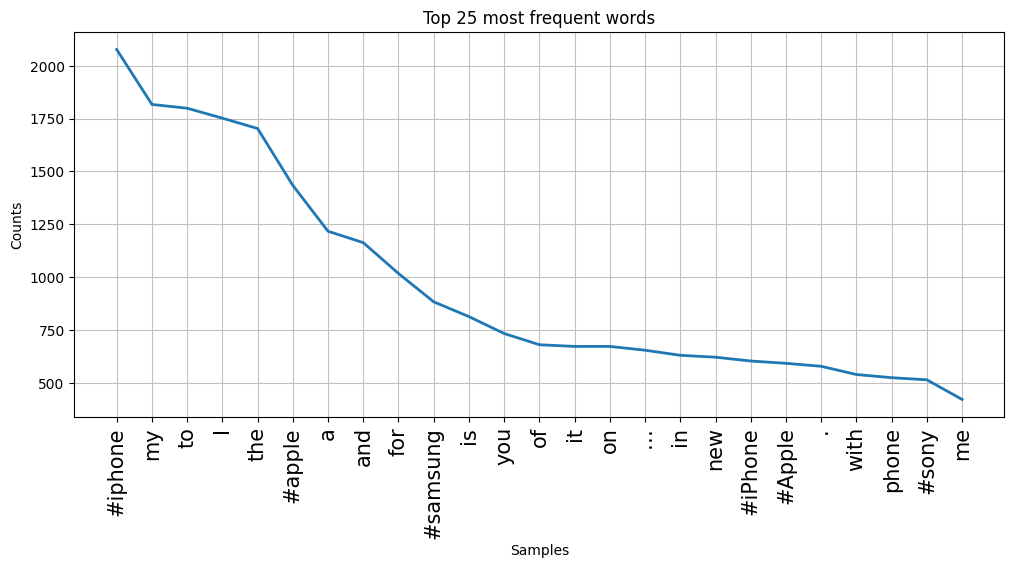

In [41]:
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most frequent words')
plt.xticks(fontsize=15)

freq_dist.plot(25)

plt.show()

In [42]:
freq_dist

FreqDist({'#iphone': 2077, 'my': 1817, 'to': 1799, 'I': 1752, 'the': 1703, '#apple': 1434, 'a': 1217, 'and': 1163, 'for': 1017, '#samsung': 883, ...})

In [43]:
all_words = []
for sent in data['cleaned_tweets']:
  all_words.extend(sent.split())

print(all_words[:50])

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'a', 'transparant', 'silicon', 'case', 'thanks', 'to', 'my', 'uncle', 'yay', 'sony', 'xperia', 's', 'sonyexperias', 'we', 'love', 'this', 'would', 'you', 'go', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'i', 'am', 'wired', 'i', 'know', 'i', 'am', 'george', 'i', 'wa']


<Axes: title={'center': 'Top 25 most frequent words'}, xlabel='Samples', ylabel='Counts'>

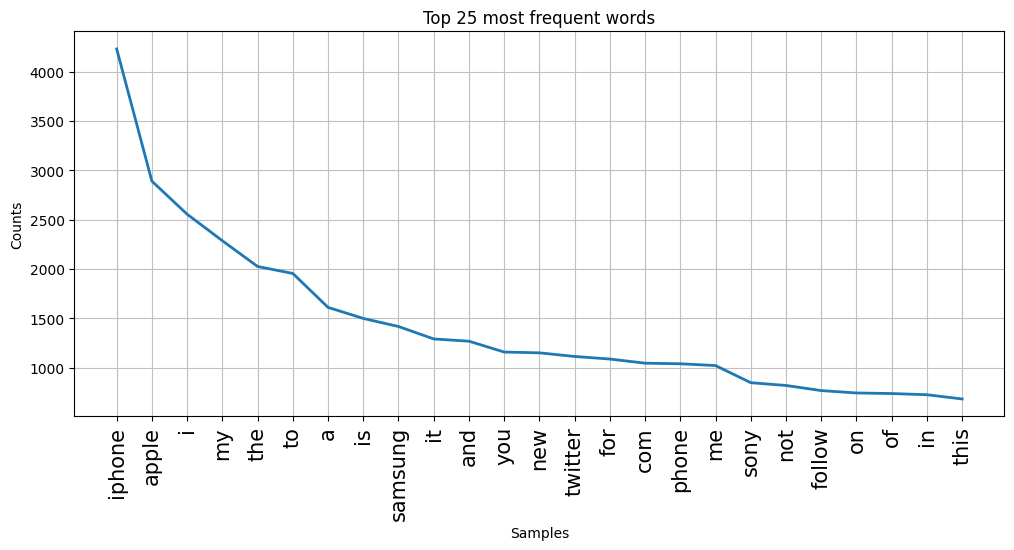

In [44]:
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most frequent words')
plt.xticks(fontsize=15)

freq_dist.plot(25)

In [45]:
stop_words = set(stopwords.words('english'))

In [46]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stop_words.update(ENGLISH_STOP_WORDS)

In [47]:
len(stop_words)

378

In [48]:
def tweet_cleaner_with_stopwords(text):
  new_text = re.sub(r"'s\b", " is",text)
  new_text = re.sub('#','',new_text)
  new_text = re.sub("@[A-Za-z0-9]","",new_text)
  new_text = re.sub(r"http\S+","",new_text)
  new_text = contractions.fix(new_text)
  new_text = re.sub(r"[^A-Za-z]", " ",new_text)
  new_text = new_text.lower().strip()

  new_text = [token for token in new_text.split() if token not in common_stopwords]

  new_text = [token for token in new_text if len(token) > 2]

  cleaned_test = ' '.join(lemmatizer.lemmatize(token) for token in new_text)
  return cleaned_test

In [49]:
cleaned_tweets = np.vectorize(tweet_cleaner_with_stopwords)(data['tweet'])

In [50]:
print(cleaned_tweets[:10])

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone'
 'finally transparant silicon case thanks uncle yay sony xperia sonyexperias'
 'love talk makememories unplug relax iphone smartphone wifi connect'
 'wired know george way iphone cute daventry home'
 'amazing service apple talk question unless pay stupid support'
 'iphone software update fucked phone big time stupid iphones'
 'happy instapic instadaily sony xperia xperiaz'
 'new type charger cable bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex pic twitter com pjiwq wtc'
 'bout shopping listening music iphone justme music likeforlike followforfollow'
 'photo fun selfie pool water sony camera picoftheday sun instagood boy cute outdoor']


In [51]:
data.columns

Index(['id', 'label', 'tweet', 'cleaned_tweets'], dtype='object')

In [52]:
data['cleaned_tweets_with_stopwords'] = cleaned_tweets

In [53]:
data.head()

,id,label,tweet,cleaned_tweets,cleaned_tweets_with_stopwords
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support


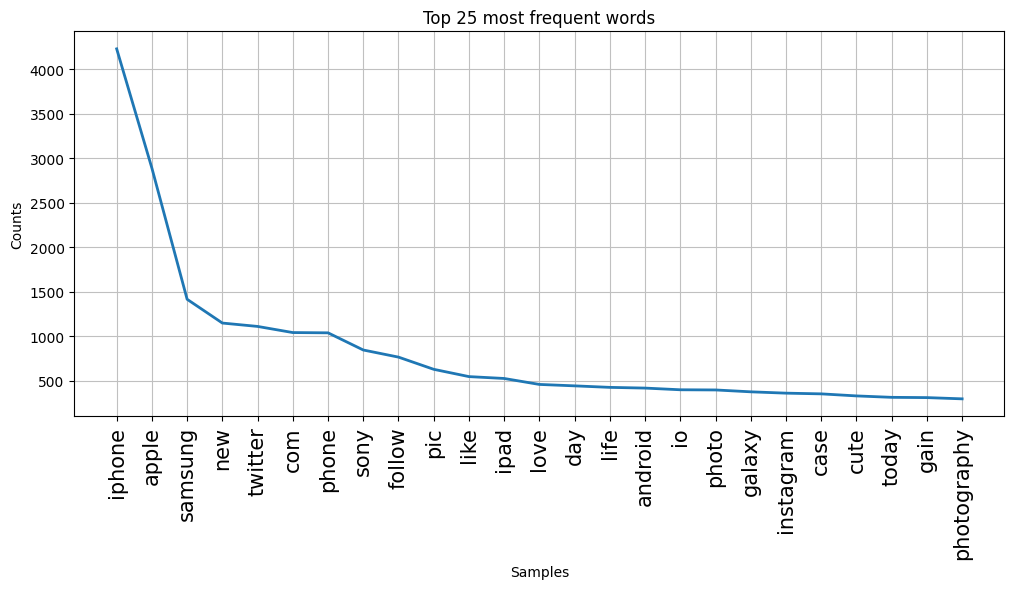

In [54]:
all_words = []

for sent in data['cleaned_tweets_with_stopwords']:
  all_words.extend(sent.split())

freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most frequent words')
plt.xticks(fontsize=15)

freq_dist.plot(25)

plt.show()

In [55]:
domain_stopwords = ['phone','mobile','twitter','rt','com','follow']
final_stopwords = domain_stopwords + list(stop_words)

In [56]:
data.head()

,id,label,tweet,cleaned_tweets,cleaned_tweets_with_stopwords
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support


In [57]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv_features = cv.fit_transform(data['cleaned_tweets_with_stopwords'])

In [58]:
cv_features.shape

(7920, 16268)

In [59]:
cv_features[0]

<1x16268 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [60]:
import pandas as pd
df = pd.DataFrame(cv_features.todense())
df

,0,1,2,3,4,5,6,7,8,9,...,16258,16259,16260,16261,16262,16263,16264,16265,16266,16267
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df.size/1e6

128.84256

In [63]:
df.size

128842560

In [64]:
df.shape

(7920, 16268)

In [65]:
import numpy as np
np.count_nonzero(df)

81642

In [66]:
print(cv.get_feature_names_out())

['aaaahhhhhhh' 'aag' 'aah' ... 'zzita' 'zzjvgtyaxl' 'zznj']


In [67]:
cv.inverse_transform(np.asarray(cv_features[10].todense()))

[array(['apple', 'color', 'crash', 'fuckin', 'hey', 'inch', 'ipod', 'make',
        'minite', 'new', 'thinner'], dtype='<U41')]

In [68]:
cv_features[10].todense()

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [69]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(cv_features, data['label'],stratify=data['label'],test_size=0.25,random_state=42)

In [70]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)

print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.9754208754208754
0.8833333333333333


In [71]:
lr1 = LogisticRegression(solver='liblinear',class_weight='balanced')
lr1.fit(X_train,y_train)

print(lr1.score(X_train,y_train))
print(lr1.score(X_test,y_test))

0.9658249158249158
0.8833333333333333


In [72]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold

In [73]:
X = cv_features
y = data['label']

In [74]:
lr1 = LogisticRegression(class_weight = 'balanced',solver='liblinear')
kfold = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)
results = cross_validate(lr1,X,y,cv=kfold,scoring='accuracy')
print(results['test_score'].mean())
print(np.round(results['test_score'].mean()*100,2), np.round(results['test_score'].std()* 100,2))

0.8837121212121211
88.37 0.84


In [75]:
from sklearn.model_selection import GridSearchCV

lr1 = LogisticRegression(class_weight='balanced',solver = 'liblinear')
c_values = np.arange(0.00001,1,0.05)

grid = GridSearchCV(estimator=lr1, param_grid = {'C':c_values},cv=kfold,scoring='accuracy')
grid_results = grid.fit(X,y)

In [76]:
grid_results

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          solver='liblinear'),
             param_grid={'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
       2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
       5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
       7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])},
             scoring='accuracy')

In [77]:
grid_results.best_params_

{'C': 0.75001}

In [78]:
grid_results.best_score_

0.8853535353535353

In [79]:
grid_results.cv_results_['mean_test_score']

array([0.78282828, 0.86388889, 0.87373737, 0.87765152, 0.88093434,
       0.88257576, 0.88308081, 0.88383838, 0.8844697 , 0.88434343,
       0.88472222, 0.88434343, 0.88434343, 0.88434343, 0.88459596,
       0.88535354, 0.88535354, 0.88497475, 0.88434343, 0.88383838])

In [80]:
grid_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

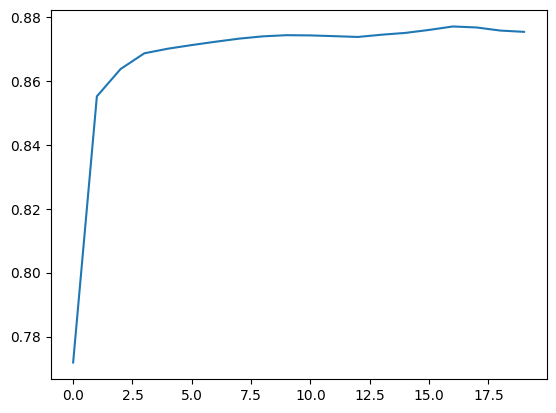

In [81]:
plt.plot(grid_results.cv_results_['mean_test_score'] - grid_results.cv_results_['std_test_score'])

In [82]:
data.columns

Index(['id', 'label', 'tweet', 'cleaned_tweets',
       'cleaned_tweets_with_stopwords'],
      dtype='object')

In [83]:
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_with_stopwords']
y = data['label']

cv = CountVectorizer()
lr1 = LogisticRegression(class_weight = 'balanced',solver='liblinear')

cv_pipe = Pipeline([('CV',cv),('LR',lr1)])

results = cross_val_score(cv_pipe,X,y,cv=kfold,scoring='accuracy')
print(np.round(results.mean()*100,2),np.round(results.std()*100,2))

88.37 0.84


In [84]:
cv_pipe.named_steps

{'CV': CountVectorizer(),
 'LR': LogisticRegression(class_weight='balanced', solver='liblinear')}

In [85]:
cv_pipe.fit(X,y)

Pipeline(steps=[('CV', CountVectorizer()),
                ('LR',
                 LogisticRegression(class_weight='balanced',
                                    solver='liblinear'))])

In [86]:
len(cv_pipe['CV'].vocabulary_)

16268

In [87]:
from sklearn.pipeline import make_pipeline, Pipeline

cv = CountVectorizer(stop_words = final_stopwords)
lr1 = LogisticRegression(class_weight = 'balanced',solver='liblinear')

cv_pipe = Pipeline([('CV',cv),('LR',lr1)])

results = cross_val_score(cv_pipe,X,y, cv=kfold, scoring='accuracy')
print(np.round(results.mean()*100,2), np.round(results.std()*100,2))

cv_pipe.fit(X,y)
len(cv_pipe['CV'].vocabulary_)

88.12 0.82


16226

In [88]:
from sklearn.pipeline import make_pipeline, Pipeline

cv = CountVectorizer(stop_words = final_stopwords,min_df=10,max_features=300)
lr1 = LogisticRegression(class_weight = 'balanced',solver='liblinear')

cv_pipe = Pipeline([('CV',cv),('LR',lr1)])

results = cross_val_score(cv_pipe,X,y, cv=kfold, scoring='accuracy')
print(np.round(results.mean()*100,2), np.round(results.std()*100,2))

cv_pipe.fit(X,y)
len(cv_pipe['CV'].vocabulary_)

85.32 1.33


300

In [89]:
doc1 = 'I love cooking'
doc2 = 'Today I cooked pasta today'

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = final_stopwords, min_df=10,max_features=300)

lr1 = LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l1',C=0.4)
cv_pipe = Pipeline([('TFIDF',tfidf),('LR1',lr1)])
results = cross_validate(cv_pipe,X,y,cv=kfold,scoring='accuracy')


In [91]:
from sklearn.decomposition import TruncatedSVD

X = data['cleaned_tweets_with_stopwords']
y = data['label']

TFIDF = TfidfVectorizer()
svd = TruncatedSVD(n_components=1000)

lr1 = LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l1')
cv_pipe = Pipeline([('TFIDF',TFIDF),('SVD',svd),('LR',lr1)])
results = cross_validate(cv_pipe,X,y,cv=kfold,scoring='accuracy')

In [92]:
results.keys()

dict_keys(['fit_time', 'score_time', 'test_score'])

In [93]:
print(np.round(results['test_score'].mean()*100,2))

87.94


In [94]:
cv = CountVectorizer(stop_words=final_stopwords,ngram_range=(1,3), min_df=5, max_features=1000)

lr1 = LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l1',C = 0.4)
cv_pipe = Pipeline([('CV',cv),('LR',lr1)])
results = cross_validate(cv_pipe,X,y,cv=kfold,scoring='accuracy')

print(np.round(results['test_score'].mean()*100,2))

85.86


In [96]:
X = data['cleaned_tweets_with_stopwords']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords, ngram_range=(1,3), min_df=5)
lr1 = LogisticRegression(class_weight = 'balanced', solver='liblinear', penalty='l1', C =0.4)
cv_pipe = Pipeline([('CV',CV),('LR',lr1)])
results = cross_validate(cv_pipe,X,y,cv=kfold,scoring='accuracy',return_train_score = True)

print(np.round(results['test_score'].mean()*100,2), np.round(results['test_score'].std()*100,2))

print(np.round(results['train_score'].mean()*100,2), np.round(results['train_score'].std()*100,2))

86.36 0.88
88.61 0.22


In [97]:
data.to_pickle('cleaned_tweets_1.pkl')